<a href="https://colab.research.google.com/github/MatiasMercandino/predicciones-ventas-/blob/main/Sales_Predictions5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Informacion de la data

In [ ]:
filename = "sales_predictions.csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Graficar datos nulos

<AxesSubplot:>

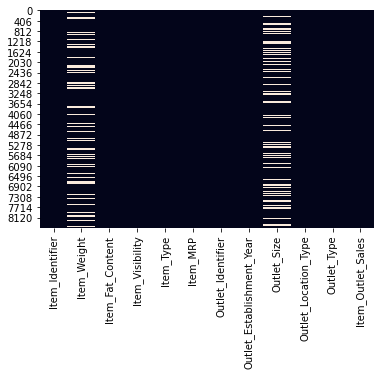

In [ ]:
import seaborn as sns

# Identificamos los missing values visualmente
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Datos estadisticos del data frame

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Trabajando datos nulos columna Item_Weight


*   Item_Weight (Variable Numerica), para esta columna, sacare un promedio y lo agregare en los NaN existentes.  
*   Haciendo un groupby del peso por año nos podemos dar cuenta que aquellos datos nulos en la columna Item_Weight corresponden al año 1985.     
*   Filtrare por año y luego al año 1985 le cambiare los valores nulos por el promedio de los otros años





In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
def Upgrade_Item_Identifier_mean(Item_Identifier):
    Item_Weight_filter  = df['Item_Identifier'] == Item_Identifier
    values_mean = df[Item_Weight_filter]['Item_Weight'].mean()
    return values_mean

In [ ]:
Item_Weight_filter_isna = df['Item_Weight'].isna()

In [ ]:
df.loc[Item_Weight_filter_isna , 'Item_Weight'] = df.apply(lambda x:Upgrade_Item_Identifier_mean( x['Item_Identifier']) ,axis=1 )
df[Item_Weight_filter_isna]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,8.260,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,8.315,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,14.500,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,5.000,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,17.250,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,19.100,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,12.150,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [ ]:
#df=df.sort_values(by=['Item_Identifier','Item_Weight'])
#df.head()

In [ ]:
#df["Item_Weight"]=df["Item_Weight"].fillna(method="ffill")

# Trabajando datos nulos columna Outlet_Size


*   Outlet_Size (Variable Categorica). Se puede ver que Aquellos Size = High son pocos comparados con los otros 2, por lo tanto podria agregar este High a aquellos datos nulos.
*   Haciendo un groupby del peso por año nos podemos dar cuenta que aquellos datos nulos en la columna Item_Weight corresponden al año 1985.                


In [ ]:
df[["Outlet_Size"]].value_counts()

Outlet_Size
Medium         2793
Small          2388
High            932
dtype: int64

In [ ]:
df=df.sort_values(by=['Outlet_Identifier','Outlet_Size'])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8451,FDK21,7.905,Low Fat,0.010028,Snack Foods,249.6408,OUT049,1999,Medium,Tier 1,Supermarket Type1,3254.4304
8467,FDV31,9.800,LF,0.000000,Fruits and Vegetables,175.2370,OUT049,1999,Medium,Tier 1,Supermarket Type1,3881.6140
8470,FDW27,5.860,Regular,0.151088,Meat,155.1314,OUT049,1999,Medium,Tier 1,Supermarket Type1,1551.3140
8475,NCS17,18.600,Low Fat,0.080627,Health and Hygiene,92.5436,OUT049,1999,Medium,Tier 1,Supermarket Type1,378.1744


In [ ]:
df['Outlet_Size'].fillna("High", inplace=True)

In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum().sum()

0

# Ordenando data por Peso


In [ ]:
df=df.sort_values("Item_Weight",ascending=False)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
483,FDC02,21.35,Low Fat,0.115195,Canned,258.3278,OUT010,1998,High,Tier 3,Grocery Store,520.6556
43,FDC02,21.35,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
2368,FDC02,21.35,Low Fat,0.068809,Canned,258.5278,OUT035,2004,Small,Tier 2,Supermarket Type1,5206.5560
5524,FDR07,21.35,Low Fat,0.136120,Fruits and Vegetables,94.1094,OUT019,1985,Small,Tier 1,Grocery Store,190.4188
4257,FDR07,21.35,Low Fat,0.130127,Fruits and Vegetables,96.2094,OUT010,1998,High,Tier 3,Grocery Store,190.4188


# Gráfico 1, Cantidad y Peso Promedio de productos por año

In [ ]:
# conseguir número de producto por año
numberUniqueYear = df.groupby(['Outlet_Establishment_Year'])['Item_Identifier'].nunique()
# esta es una serie de pandas
numberUniqueYear

Outlet_Establishment_Year
1985    1138
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
Name: Item_Identifier, dtype: int64

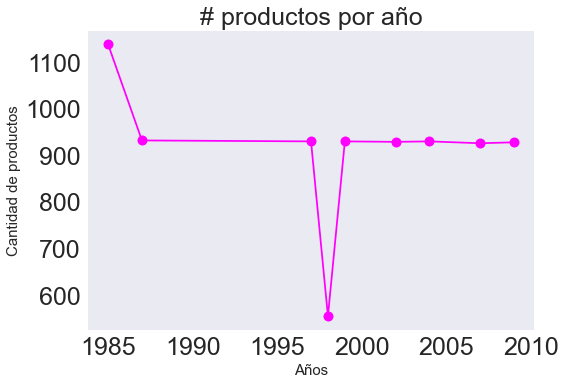

In [ ]:
uniqueYears = list(numberUniqueYear.index)
uniqueYears
numproductos = list(numberUniqueYear.values)
numproductos
plt.style.use('seaborn')
plt.plot(uniqueYears, numproductos,c = 'magenta', marker = '.', markersize = 20)
plt.xlabel("Años",fontsize=15)
plt.ylabel("Cantidad de productos",fontsize=15)
plt.xticks(fontsize = 25);
plt.yticks(fontsize = 25);
plt.title("# productos por año",fontsize=25)

plt.grid()
#plt.annotate('Estan fuera de la concentracion de datos', xy=(1996,200), xytext=(1995,700), arrowprops=dict(facecolor='black', shrink=0.05))

In [ ]:
ID_W=df.groupby('Outlet_Establishment_Year')['Item_Weight'].mean().sort_values(ascending = False)
ID_W

Outlet_Establishment_Year
1987    13.006148
1985    12.961432
1999    12.917446
1998    12.913153
2009    12.873346
1997    12.866801
2004    12.829349
2007    12.826668
2002    12.649989
Name: Item_Weight, dtype: float64

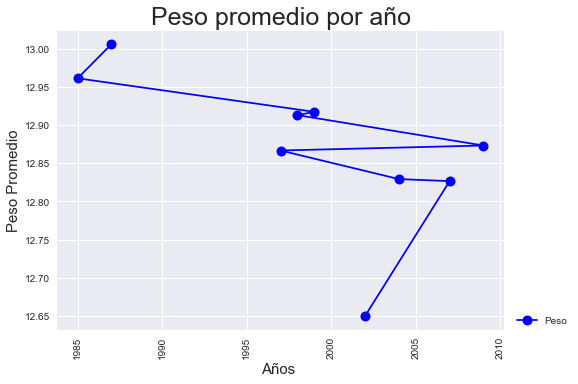

In [ ]:
plt.plot(ID_W.index,ID_W.values, label = "Peso",c = 'blue', marker = '.', markersize = 20);
plt.legend(loc=(1.02,0))
plt.xlabel("Años ",fontsize=15);
plt.ylabel("Peso Promedio",fontsize=15);
plt.title("Peso promedio por año",fontsize=25);  
plt.xticks(rotation = 90);

Conclusiones Gráfico 1:
* La cantidad de productos tuvo su pick en sus inicios llegando a tener aproximadamente 1150 productos en el año 1985 y luego tuvo una baja llegando a los años 2000, el resto es parejo. 
* El peso promedio de los productos va variando a lo largo de los año pero no cambia mucho mas alla del rango de [12.6-13]

# Gráfico 2, Cantidad, Peso promedio y Top 10 (%) por tipo 

In [ ]:
a=df.groupby(['Item_Type'])['Item_Identifier'].nunique()

C:\Users\Matu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


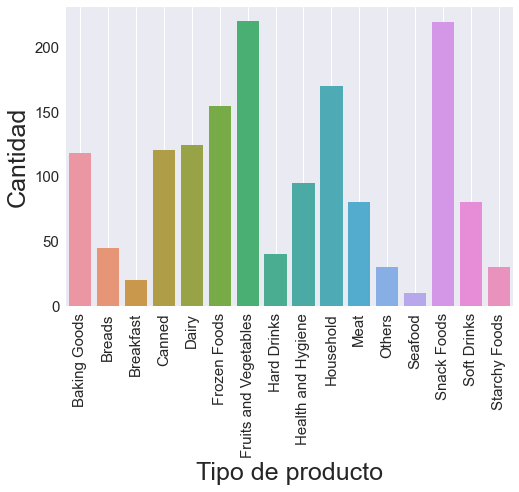

In [ ]:
#plt.bar(a.index, a.values);

sns.barplot(a.index, a.values);
plt.grid();
plt.xlabel("Tipo de producto",fontsize = 25)
plt.ylabel("Cantidad",fontsize = 25)
plt.xticks(rotation = 90);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

C:\Users\Matu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


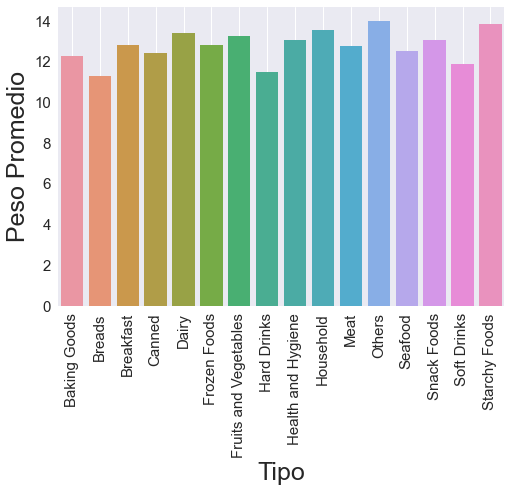

In [ ]:
c=df.groupby(['Item_Type'])['Item_Weight'].mean()
sns.barplot(c.index, c.values);
plt.grid();
plt.xlabel("Tipo",fontsize = 25)
plt.ylabel("Peso Promedio",fontsize = 25)
plt.xticks(rotation = 90);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

* Se graficara el top 10 de de los tipo de productos que mas hay (en %)

In [ ]:
r=df.groupby("Item_Type").size().sort_values(ascending = False).head(10)
r

Item_Type
Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
dtype: int64

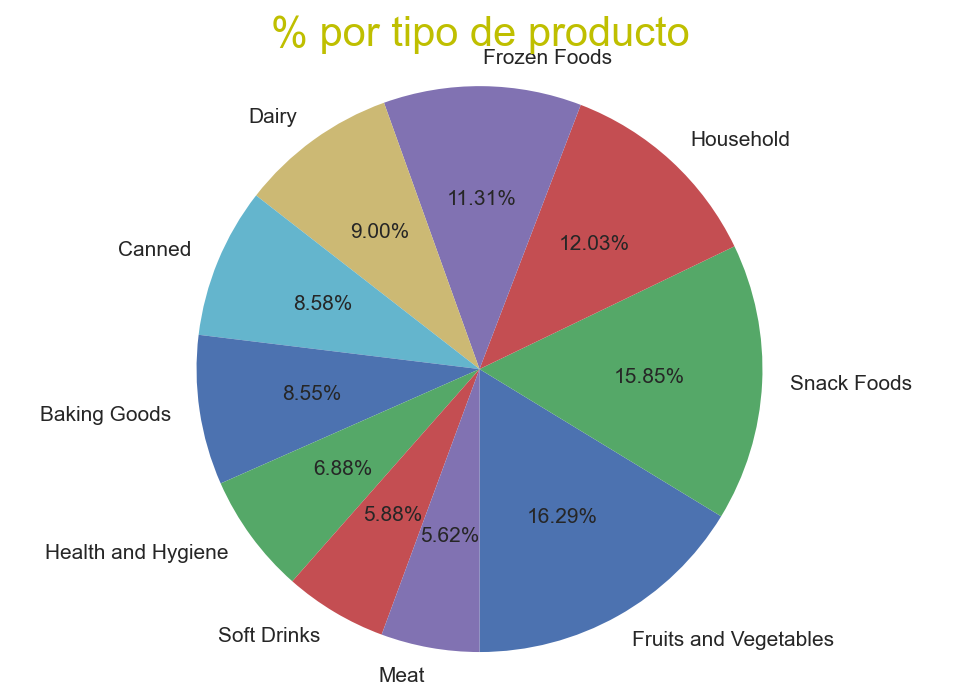

In [ ]:
import matplotlib.pyplot as plt

#Gráfico de torta; cortes ordenados y gráficados contra reloj.
size = r.values
etiquetas = r.index
#explotar = [0, 0, 0.1, 0] #sirve para destacar alguna porcion. El valor es cuanto se separa de la torta.

fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,1,1) 

ax1.pie(size, labels=etiquetas, autopct="%.2f%%", shadow = False, startangle=-90)
# autopct = porcentaje automático; shadow = grafico con sombra; startangle = ángulo de inicio
# %.2f%% formato de decimal, viene del lenguaje C. Sí, python está escrito en C.

ax1.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)



plt.title("% por tipo de producto",c="y", fontsize=20)
plt.show()

Conclusiones Gráfico 2: 
* Frutas, Vegatales, Snacks y productos de Salud e Higiene (representan un 44% de los productos con un 16.28%,15.86% y 12.03% respectivamente) y se esperaria tambien que los que mas se vendan. 
* En general todo los productos tienen un peso promedio parecido, por lo que este no influiria mucho a la hora de que el producto se venda o no, ni en su almacenaje, etc. 

# Grafico 3: representa en cual supermercado hay una mayor cantidad de productos

In [ ]:
typo=df.groupby("Outlet_Type")["Outlet_Type"].count()
typo

Outlet_Type
Grocery Store        1082
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     932
Name: Outlet_Type, dtype: int64

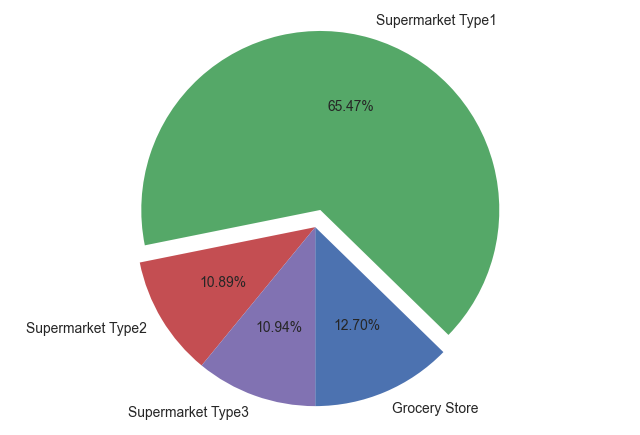

In [ ]:
import matplotlib.pyplot as plt

#Gráfico de torta; cortes ordenados y gráficados contra reloj.
size = typo.values
etiquetas = typo.index
explotar = [0, 0.1, 0, 0] #sirve para destacar alguna porcion. El valor es cuanto se separa de la torta.

fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1) 

ax1.pie(size, labels=etiquetas, explode=explotar, autopct="%.2f%%", shadow = False, startangle=-90)
# autopct = porcentaje automático; shadow = grafico con sombra; startangle = ángulo de inicio
# %.2f%% formato de decimal, viene del lenguaje C. Sí, python está escrito en C.

ax1.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)

plt.show()

Conclusión Gráfico 3:
* Se puede ver claramente que los Superketmarket Type1 son aquellos supermercados donde mas productos se tiene y quizas tambien el que mas ventas o ingresos tengan. 


# Grafico 4: Ventas por producto y por año

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
483,FDC02,21.35,Low Fat,0.115195,Canned,258.3278,OUT010,1998,High,Tier 3,Grocery Store,520.6556
43,FDC02,21.35,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
2368,FDC02,21.35,Low Fat,0.068809,Canned,258.5278,OUT035,2004,Small,Tier 2,Supermarket Type1,5206.5560
5524,FDR07,21.35,Low Fat,0.136120,Fruits and Vegetables,94.1094,OUT019,1985,Small,Tier 1,Grocery Store,190.4188
4257,FDR07,21.35,Low Fat,0.130127,Fruits and Vegetables,96.2094,OUT010,1998,High,Tier 3,Grocery Store,190.4188


C:\Users\Matu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Matu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


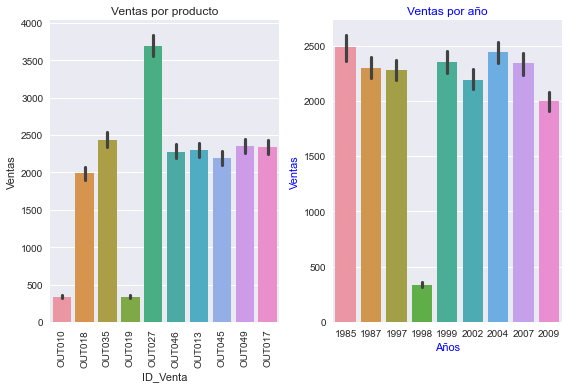

In [ ]:
# Subplot 1 
plt.subplot(1, 2, 1);
sns.barplot(df["Outlet_Identifier"], df["Item_Outlet_Sales"]);
plt.xlabel("ID_Venta")
plt.ylabel("Ventas")
plt.title("Ventas por producto")
plt.xticks(rotation = 90);

#plt.scatter(df_intercept['feature'].values, df_intercept['actual'].values, c= 'k');
#plt.title('intercept', fontsize = 12);
# Subplot 2
plt.subplot(1, 2, 2);
import seaborn as sns
sns.barplot(df["Outlet_Establishment_Year"], df["Item_Outlet_Sales"]);
plt.xlabel("Años",c="blue")
plt.ylabel("Ventas",c="blue")
plt.title("Ventas por año",c="blue")

plt.tight_layout()

Conclusiones gráfico 4:
* El producto OUT027 es aquel producto que mas se vende, muy por sobre el resto y por otro lado aquellos productos OUT010 y OUT019 estan muy bajos en venta.
* Se puede ver que en el año 1998 hubo una baja en ventas bastante importa, se desconoce el motivo. 

# Analisis estadistico de los datos, Hisogramas y Cajas
* Se puede ver que los datos estan bastante...
* Del grafico de caja podemos notar que la mediana de aquellos Outlet_Size small es mayor a la de los otros 2, pero por otro lado es aquel que tiene mayor cantidad de datos que puede producir sesgo.


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
483,FDC02,21.35,Low Fat,0.115195,Canned,258.3278,OUT010,1998,High,Tier 3,Grocery Store,520.6556
43,FDC02,21.35,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
2368,FDC02,21.35,Low Fat,0.068809,Canned,258.5278,OUT035,2004,Small,Tier 2,Supermarket Type1,5206.5560
5524,FDR07,21.35,Low Fat,0.136120,Fruits and Vegetables,94.1094,OUT019,1985,Small,Tier 1,Grocery Store,190.4188
4257,FDR07,21.35,Low Fat,0.130127,Fruits and Vegetables,96.2094,OUT010,1998,High,Tier 3,Grocery Store,190.4188


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


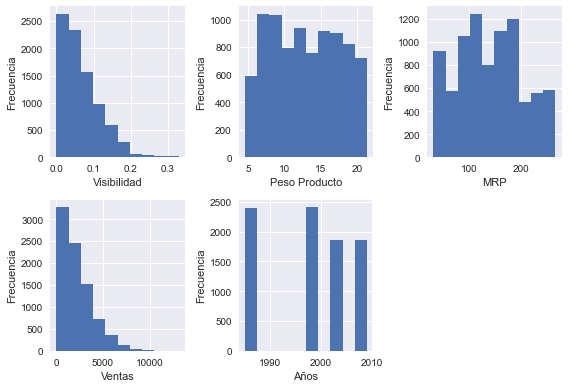

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,3,1)
ax1=df['Item_Visibility'].hist()
plt.xlabel("Visibilidad")
plt.ylabel("Frecuencia")



ax2 = fig.add_subplot(2,3,2)
ax2=df['Item_Weight'].hist()
plt.xlabel("Peso Producto")
plt.ylabel("Frecuencia")


ax3 = fig.add_subplot(2,3,3)
ax3=df['Item_MRP'].hist()
plt.xlabel("MRP")
plt.ylabel("Frecuencia")


ax4 = fig.add_subplot(2,3,4)
ax4=df['Item_Outlet_Sales'].hist()
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")


ax5 = fig.add_subplot(2,3,5)
ax5=df['Outlet_Establishment_Year'].hist()
plt.xlabel("Años")
plt.ylabel("Frecuencia")

fig.tight_layout()

Conlclusión Histogramas:
* Los histogramas de Peso y MRP son histogramas de poca calidad (existen muchas modas, por esto,muchas barras tienen misma frecuencia) , en cambio los de Visibilidad  y Ventas tiene mayor calidad pero no con tanta variacion (Tienen sesgo hacia la derecha)  

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Visibility'>

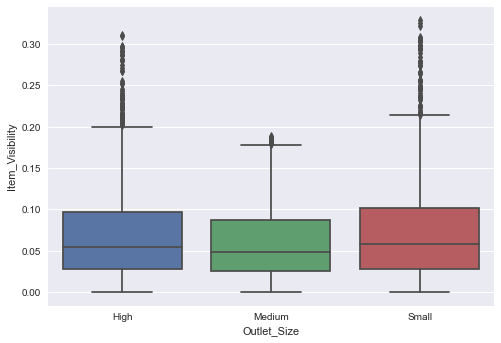

In [ ]:
sns.boxplot(x='Outlet_Size', y='Item_Visibility', data=df)

Conclusión Gráfico de cajas 
* Los Size = Medium son aquellos datos que estan menos dispersos los mas dispesos son los Small.
* Todos son asimetricos positivos, sus datos sobre la mediana estan mas sesgados positivamente.

# Correlacion entre variables (Mapa Calor)
* Se puede ver que la mayor correlacion se alcanza entre el MRP del producto y sus Ventas

In [ ]:
#from datetime import datetime, timedelta
#df['Outlet_Establishment_Year'] = pd.to_datetime(df['Outlet_Establishment_Year'], format="%Y")
#df.head()

In [ ]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009173,0.025975,-0.013426,0.013168
Item_Visibility,-0.009173,1.000000,-0.001155,-0.074325,-0.128297
Item_MRP,0.025975,-0.001155,1.000000,0.004599,0.567803
Outlet_Establishment_Year,-0.013426,-0.074325,0.004599,1.000000,-0.049083
Item_Outlet_Sales,0.013168,-0.128297,0.567803,-0.049083,1.000000


#  Random forest nos sirve para correlaciones bajas

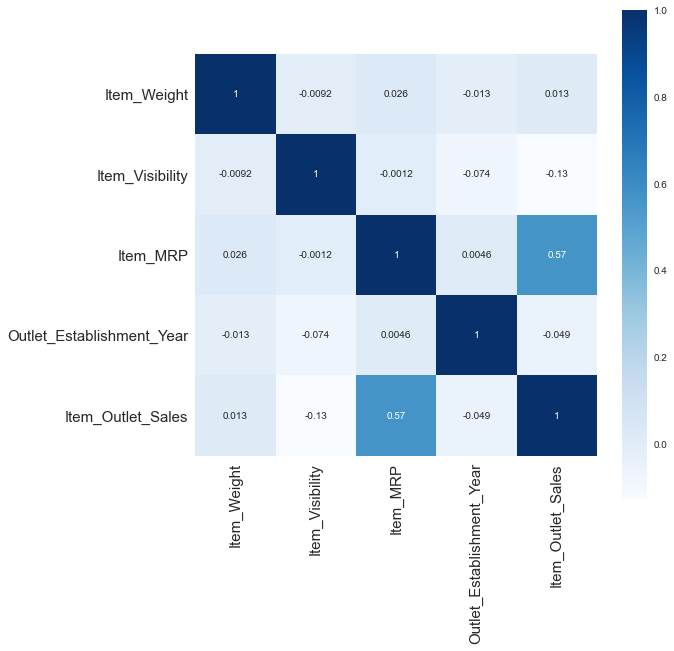

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True,square=True,cmap="Blues");
#plt.title("Correlacion entre variables",fontsize=25)
plt.tick_params(labelsize=15)

Conclusión Correlación
* Aquellas Variables que mas relación tienen entre ellas son el MRP con Outlet_Sales

# Creando Target

In [ ]:
df["Item_Outlet_Sales"].describe()

count     8519.000000
mean      2181.188779
std       1706.511093
min         33.290000
25%        834.247400
50%       1794.331000
75%       3100.630600
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
Rangos = []
for i in df["Item_Outlet_Sales"]:
    if i >=33.290000 and i <=834.247400:
        Rangos.append(0)
    elif i >834.247400 and i <=1794.331000:
        Rangos.append(1)
    elif i >1794.331000 and i <=3100.630600: 
        Rangos.append(2)
    else:
        Rangos.append(3)

In [ ]:
df["Rangos"]=Rangos
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Rangos
483,FDC02,21.35,Low Fat,0.115195,Canned,258.3278,OUT010,1998,High,Tier 3,Grocery Store,520.6556,0
43,FDC02,21.35,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228,3
2368,FDC02,21.35,Low Fat,0.068809,Canned,258.5278,OUT035,2004,Small,Tier 2,Supermarket Type1,5206.5560,3
5524,FDR07,21.35,Low Fat,0.136120,Fruits and Vegetables,94.1094,OUT019,1985,Small,Tier 1,Grocery Store,190.4188,0
4257,FDR07,21.35,Low Fat,0.130127,Fruits and Vegetables,96.2094,OUT010,1998,High,Tier 3,Grocery Store,190.4188,0


# Regresion lineal
* Transformaremos a tipo numerico aquellas variables categoricas mediante una transformación dummie

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df2=pd.get_dummies(data=df, columns = ["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type"])
df2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Rangos,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
483,FDC02,21.35,0.115195,258.3278,OUT010,1998,520.6556,0,0,1,...,1,0,0,0,0,1,1,0,0,0
43,FDC02,21.35,0.069103,259.9278,OUT018,2009,6768.5228,3,0,1,...,0,1,0,0,0,1,0,0,1,0
2368,FDC02,21.35,0.068809,258.5278,OUT035,2004,5206.5560,3,0,1,...,0,0,1,0,1,0,0,1,0,0
5524,FDR07,21.35,0.136120,94.1094,OUT019,1985,190.4188,0,0,1,...,0,0,1,1,0,0,1,0,0,0
4257,FDR07,21.35,0.130127,96.2094,OUT010,1998,190.4188,0,0,1,...,1,0,0,0,0,1,1,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df2.drop(columns = ["Item_Outlet_Sales","Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year","Rangos"]),
                                        df2['Item_Outlet_Sales'],
                                        random_state = 123)

modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)
predictions = modelo.predict(X_test)
r2=r2_score(y_test,predictions)

In [ ]:
r2

0.5345459529373405

# KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(
                                        df2.drop(columns = ["Rangos","Item_Outlet_Sales","Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"]),
                                        df2['Item_Outlet_Sales'],
                                        random_state = 123)

regressor = KNeighborsRegressor(n_neighbors=2)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
r2=r2_score(y_test,predictions)

In [ ]:
r2

0.17732281062351474

# Arbol Decision

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(
                                        df2.drop(columns = ["Rangos","Item_Outlet_Sales","Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"]),
                                        df2['Item_Outlet_Sales'],
                                        random_state = 123)

arbol_reg = DecisionTreeRegressor(random_state = 0)
arbol_reg.fit(X_train, y_train)
predictions = arbol_reg.predict(X_test)
r2=r2_score(y_test,predictions)

In [ ]:
r2

0.1491007224740224

# Conclusion de regresiones
* La regresion lineal es aquella que mas me sirve para aplicar un modelo ya que me entrega un r2 mayor que los otros 2 metodos.
* RL_r2=0.51  , KNN_r2= 0.23,  TREE_r2 = 0.15